In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf


In [2]:
""" 공부만 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_studying = pd.read_csv("keypoint_studying.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_studying

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.425881,0.566605,0.391640,0.587256,0.398511,0.545403,0.329299,0.667827,0.356962,0.572735,0.397179,0.767028,0.424201,0.571095,0.676894,0.637928,0.557019,0.463024,0.617440,0.564058,0.000000,0.000000
1,0.198871,0.781391,0.154452,0.787421,0.133364,0.745978,0.134638,0.694983,0.105760,0.589361,0.478517,0.692546,0.346544,0.389911,0.773012,0.801967,0.775933,0.541181,0.000000,0.000000,0.000000,0.000000
2,0.292814,0.597660,0.220513,0.656164,0.221686,0.529168,0.218681,0.707080,0.221475,0.424813,0.451555,0.838570,0.433676,0.263632,0.000000,0.000000,0.775824,0.069817,0.000000,0.000000,0.000000,0.000000
3,0.276083,0.633144,0.216728,0.692331,0.205332,0.573505,0.220577,0.759114,0.193218,0.467344,0.437398,0.851392,0.361575,0.323038,0.000000,0.000000,0.737116,0.294947,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.417251,0.654595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.232106,0.710768,0.185814,0.724928,0.162708,0.672675,0.161786,0.623778,0.126461,0.467832,0.510677,0.596835,0.292258,0.276152,0.000000,0.000000,0.000000,0.000000,0.737342,0.886109,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338644,0.367868,0.000000,0.000000,0.542477,0.556659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.300453,0.583653,0.241652,0.646503,0.222597,0.534929,0.253731,0.700302,0.205115,0.464908,0.433263,0.753591,0.438357,0.297608,0.685811,0.891490,0.865603,0.216106,0.782137,0.901672,0.000000,0.000000
8,0.294587,0.549293,0.232132,0.608167,0.222757,0.499110,0.237259,0.674046,0.214297,0.438032,0.428908,0.731029,0.426633,0.286662,0.687537,0.873498,0.853680,0.197451,0.769369,0.881205,0.956504,0.495946
9,0.251164,0.642905,0.211072,0.651049,0.195553,0.611248,0.204254,0.586722,0.162585,0.446785,0.509284,0.578222,0.417623,0.294902,0.832497,0.758709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
"""우선 None값 0으로 대체 """
np.sum(keypoint_studying.isnull())

nose_X              0
nose_Y              0
left_eye_X          0
left_eye_Y          0
right_eye_X         0
right_eye_Y         0
left_ear_X          0
left_ear_Y          0
right_ear_X         0
right_ear_Y         0
left_shoulder_X     0
left_shoulder_Y     0
right_shoulder_X    0
right_shoulder_Y    0
left_elbow_X        0
left_elbow_Y        0
right_elbow_X       0
right_elbow_Y       0
left_wrist_X        0
left_wrist_Y        0
right_wrist_X       0
right_wrist_Y       0
dtype: int64

In [4]:
keypoint_studying.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.283857,0.447116,0.241284,0.471685,0.243596,0.423704,0.223347,0.486003,0.223429,0.359738,0.385424,0.551492,0.364996,0.266278,0.392320,0.399346,0.449433,0.146289,0.343121,0.318550,0.349663,0.196258
std,0.151544,0.236559,0.137875,0.243546,0.135959,0.219181,0.133276,0.257693,0.130755,0.195885,0.191443,0.293202,0.184686,0.192288,0.374569,0.389287,0.369155,0.169764,0.367068,0.356568,0.369878,0.237807
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241212,0.361765,0.185528,0.393426,0.182404,0.333110,0.174649,0.430895,0.166085,0.280304,0.362759,0.447115,0.347902,0.138198,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.306279,0.514974,0.250981,0.537728,0.253063,0.497011,0.232565,0.568140,0.229671,0.416692,0.455123,0.653554,0.437542,0.269977,0.541457,0.546488,0.639120,0.087589,0.000000,0.000000,0.000000,0.000000
75%,0.396064,0.616974,0.339707,0.641280,0.346082,0.573738,0.306265,0.661971,0.312980,0.477984,0.508025,0.766196,0.469280,0.353409,0.753772,0.779417,0.781450,0.260320,0.733727,0.645225,0.735305,0.402116
max,0.581512,0.977323,0.561175,0.857150,0.562891,0.861521,0.579330,0.900819,0.552224,0.893992,0.663584,0.916042,0.615337,0.914201,0.960585,0.986109,0.963962,0.640308,0.961603,0.973465,0.970381,0.946276


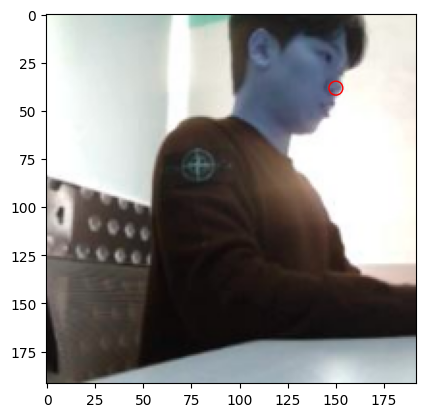

In [21]:
# test 
num = 1  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_studying[f"{point_check}Y"][num]*192,keypoint_studying[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='red',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

In [6]:
body_part = [ 'left_eye_', 'right_eye_','left_ear_','right_ear_',
       'left_shoulder_', 'right_shoulder_', 'left_elbow_', 'right_elbow_',
        'left_wrist_',  'right_wrist_','nose_']

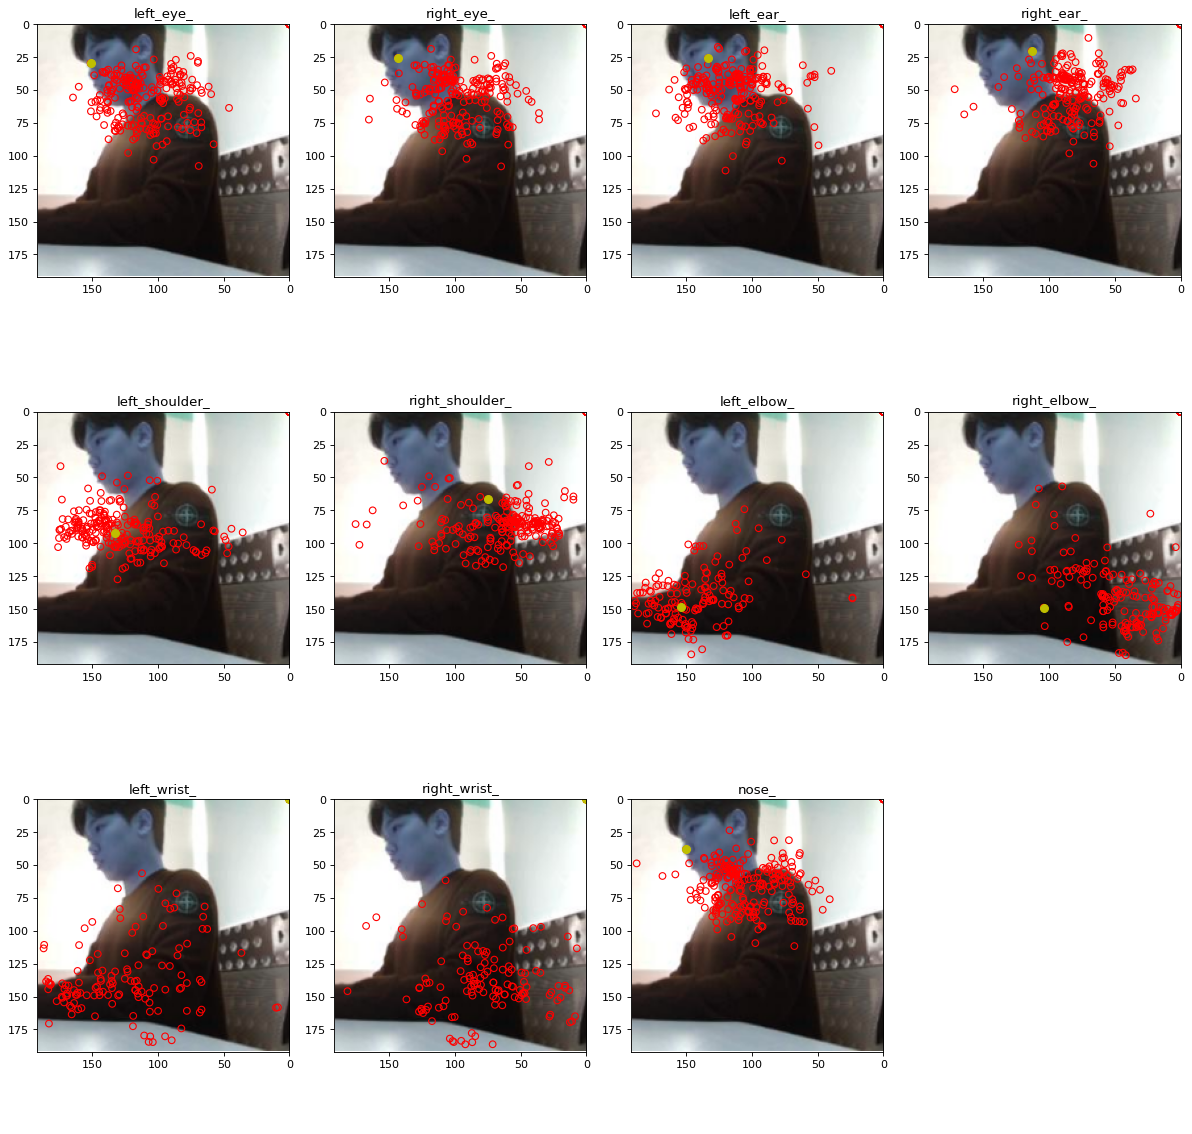

In [7]:
num = 1

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/studying/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"]*192,keypoint_studying[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_studying[f"{body_part[idx]}Y"][num]*192,keypoint_studying[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


*------------------------------------------------------------------------------------------------------------------------------------------------------------*

In [8]:
""" 딴짓 하는 데이터셋을 추출"""
pd.set_option('display.max_rows', None)
keypoint_playing = pd.read_csv("keypoint_playing.csv")  

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
keypoint_playing

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
0,0.108453,0.188118,0.079799,0.211656,0.072383,0.147514,0.111603,0.208735,0.100037,0.060476,0.299707,0.170413,0.247275,0.023572,0.576063,0.216647,0.000000,0.000000,0.805590,0.238872,0.000000,0.000000
1,0.677465,0.812987,0.645498,0.844939,0.621500,0.806434,0.000000,0.000000,0.562600,0.719110,0.000000,0.000000,0.651252,0.582602,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.759695,0.050446,0.716228,0.054466,0.705639,0.050701,0.681933,0.167590,0.674055,0.153159,0.781789,0.319708,0.000000,0.000000,0.790459,0.312627,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.509021,0.298181,0.445640,0.338482,0.449056,0.256348,0.391263,0.402775,0.392678,0.202892,0.693231,0.465730,0.583774,0.106233,0.000000,0.000000,0.911178,0.044980,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.516708,0.306772,0.451740,0.349700,0.453863,0.262198,0.407881,0.404599,0.411901,0.209113,0.698695,0.464140,0.587067,0.110261,0.972640,0.529981,0.907769,0.039463,0.000000,0.000000,0.000000,0.000000
7,0.585567,0.718096,0.000000,0.000000,0.523042,0.699928,0.000000,0.000000,0.463761,0.636753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.424375,0.680995,0.366620,0.723351,0.376002,0.636947,0.365252,0.788648,0.387442,0.592874,0.593130,0.921980,0.689200,0.525716,0.000000,0.000000,0.000000,0.000000,0.685501,0.782983,0.000000,0.000000


In [9]:
np.sum(keypoint_playing.isnull())

nose_X              0
nose_Y              0
left_eye_X          0
left_eye_Y          0
right_eye_X         0
right_eye_Y         0
left_ear_X          0
left_ear_Y          0
right_ear_X         0
right_ear_Y         0
left_shoulder_X     0
left_shoulder_Y     0
right_shoulder_X    0
right_shoulder_Y    0
left_elbow_X        0
left_elbow_Y        0
right_elbow_X       0
right_elbow_Y       0
left_wrist_X        0
left_wrist_Y        0
right_wrist_X       0
right_wrist_Y       0
dtype: int64

In [10]:
keypoint_playing.describe()

,nose_X,nose_Y,left_eye_X,left_eye_Y,right_eye_X,right_eye_Y,left_ear_X,left_ear_Y,right_ear_X,right_ear_Y,left_shoulder_X,left_shoulder_Y,right_shoulder_X,right_shoulder_Y,left_elbow_X,left_elbow_Y,right_elbow_X,right_elbow_Y,left_wrist_X,left_wrist_Y,right_wrist_X,right_wrist_Y
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.290294,0.322268,0.229093,0.306502,0.245666,0.302052,0.187836,0.264405,0.233380,0.257550,0.258188,0.266816,0.298077,0.169970,0.195806,0.138121,0.222909,0.105365,0.095309,0.099975,0.106057,0.088589
std,0.260849,0.296323,0.229967,0.301870,0.233362,0.289134,0.205252,0.294864,0.222502,0.267529,0.294358,0.325863,0.297076,0.225153,0.360925,0.270126,0.372625,0.225639,0.221994,0.247843,0.239078,0.211460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.300042,0.335094,0.232680,0.341053,0.243178,0.280432,0.052349,0.145620,0.267600,0.209113,0.000000,0.000000,0.401495,0.039710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.525656,0.591976,0.435919,0.555166,0.453025,0.570398,0.348471,0.473078,0.422058,0.507290,0.562798,0.512937,0.580948,0.307178,0.000000,0.000000,0.671481,0.029482,0.000000,0.000000,0.000000,0.000000
max,0.833870,0.914006,0.879377,0.933762,0.769591,0.925903,0.697135,0.876027,0.757844,0.922661,0.781789,0.966828,0.790472,0.765376,0.981062,0.970773,0.977955,0.963244,0.907158,0.968574,0.966822,0.952260


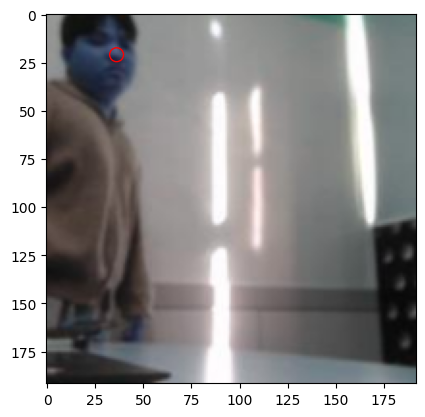

In [22]:
# test 
num = 0  # 확인하려는 img
point_check = "nose_" # 확인하려는 부위

tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
plt.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))

plt.scatter(keypoint_playing[f"{point_check}Y"][num]*192,keypoint_playing[f"{point_check}X"][num]*192, 
            marker='o', facecolors='none', edgecolors='red',s=100)

# nose = keypoints_with_scores[0][0][0]
# axes = np.array(nose[:2]*[192,192]).astype(int)
# plt.scatter(axes[1],axes[0],c="r")  # x,y 좌표 반대로 

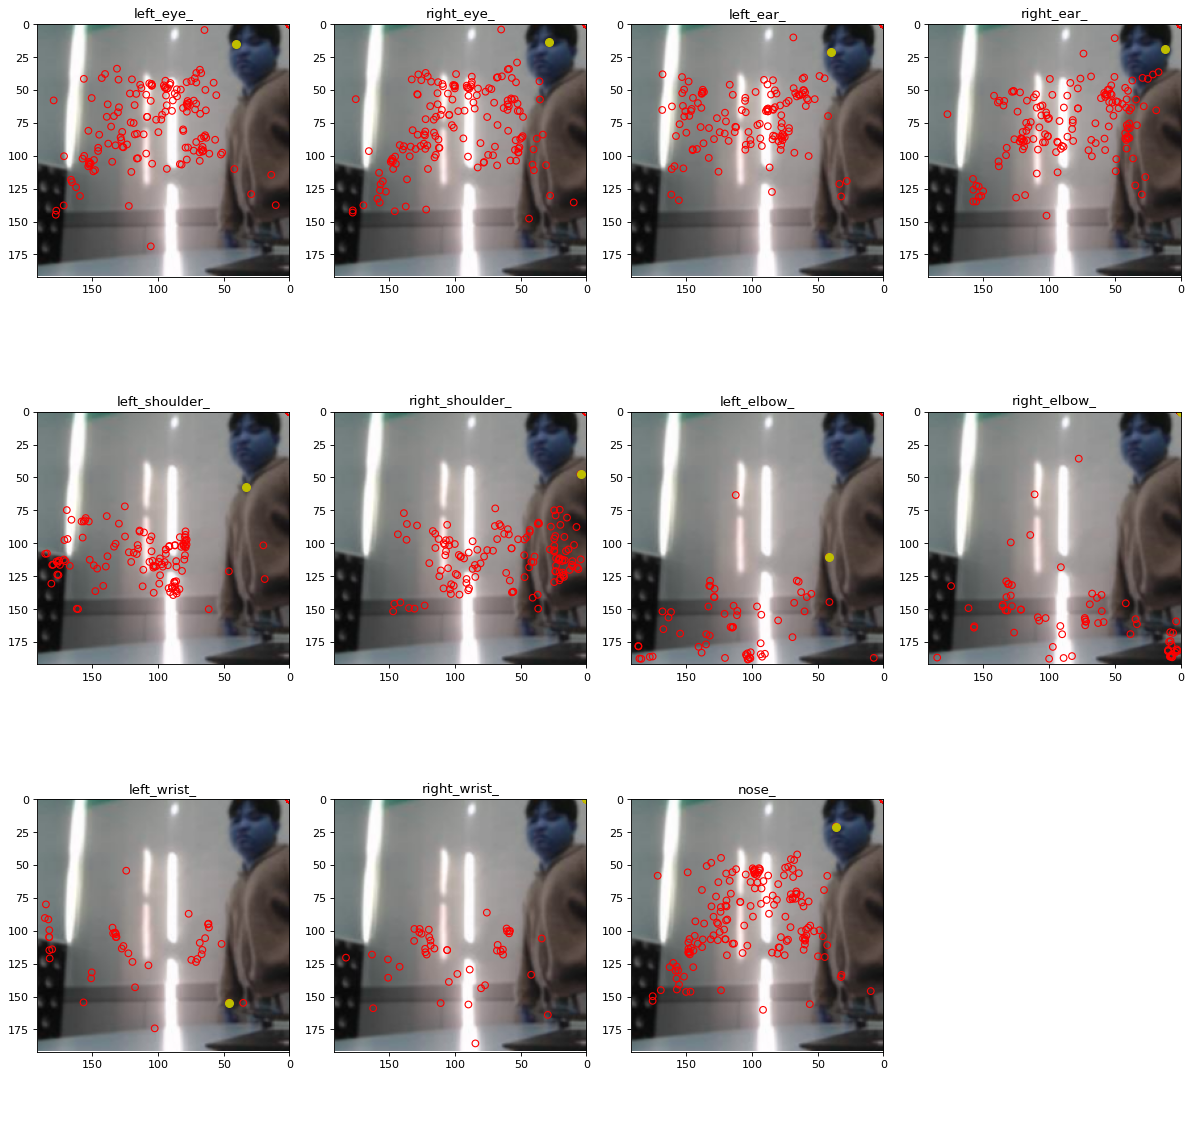

In [12]:
num = 0

fig,axes = plt.subplots(3,4,figsize=(15,15), dpi=80)
fig.subplots_adjust(hspace=0.1)  
axes = axes.ravel()

for idx,ax in enumerate(axes[:11]):
    tmp_img = cv2.imread(f"imgset/playing/{num}.jpg")
    tmp_img = tf.image.resize_with_pad(np.expand_dims(tmp_img, axis=0), 192,192)
    ax.imshow(tf.cast(np.squeeze(tmp_img), dtype=tf.int32))
    
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"]*192,keypoint_playing[f"{body_part[idx]}X"]*192 ,
      marker='o', facecolors='none', edgecolors='red')
    ax.scatter(keypoint_playing[f"{body_part[idx]}Y"][num]*192,keypoint_playing[f"{body_part[idx]}X"][num]*192 ,
      marker='o', s=50, c='y')
    
    ax.set_title(body_part[idx])
    ax.set_xlim(192, 0)  # x,y 좌표 반대로 
    ax.set_ylim(192, 0)
    
    
axes[-1].axis('off')  
plt.tight_layout()


# 모델 만들기

In [13]:
"""공부,딴짓 포인트들을 keypoint 데이터 프레임으로 합쳐줌"""
keypoint_playing["label"] = 0  # 딴짓 중 lable = 0
keypoint_studying["label"] = 1 # 공부 중 lable = 1
keypoint = pd.concat([keypoint_playing,keypoint_studying],axis=0)
keypoint = keypoint.sample(frac=1).reset_index(drop=True)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [15]:
X = keypoint.iloc[:,:-1]
y = keypoint.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [16]:
model = SVC(kernel="rbf").fit(X_train,y_train)
y_pred = model.predict(X_test)
score = model.score(X_test,y_test)

In [17]:
print('Score:', np.around(score,4))

Score: 0.7923


In [18]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[49 15]
 [12 54]]


In [23]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.782608695652174
Recall: 0.8181818181818182
F1 Score: 0.8


# 실전 테스트

In [24]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import cv2
import warnings

warnings.filterwarnings("ignore")

interpreter = tf.lite.Interpreter(model_path="lite-model_movenet_singlepose_lightning_3.tflite")
interpreter.allocate_tensors()

In [25]:
cap = cv2.VideoCapture(0)
interval = 0

while cap.isOpened():
    data = []
    ret, frame = cap.read()
    if interval % 100 == 0:
        
        # Reshape image
        img = frame.copy()
        img = tf.image.resize_with_pad(np.expand_dims(img, axis=0), 192,192)
        input_image = tf.cast(img, dtype=tf.float32)

        # Setup input and output 
        input_details = interpreter.get_input_details()
        output_details = interpreter.get_output_details()

        # Make predictions 
        interpreter.set_tensor(input_details[0]['index'], np.array(input_image))
        interpreter.invoke()
        keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])

            
        point_cnt = 0  # 관절수 카운트
        for keypoints_with_score in keypoints_with_scores[0][0][:11]:
            for ax in range(2):
                data.append(keypoints_with_score[:2][ax])
                if (keypoints_with_score[2]> 0.1):# 0.1 이하는 point 감지 못 한 것으로 간주
                    point_cnt += 1
            
        # 모델 테스트
        data = np.array(data)
        state = model.predict(data.reshape(1, -1))
        print(point_cnt)
        if point_cnt >= 16 :   #  2개(x,y좌표) * 3(최소 3관절 이상) * 2(오른쪽,왼쪽)
            if state == 1 : 
                print("공부 중")
            elif state == 0 : 
                print("딴짓 중")
        else : print("딴짓 중 _ 관절수 부족")
            
        interval = 0         
    interval += 1 

    
    cv2.imshow('MoveNet Lightning', frame)
    
    if cv2.waitKey(10) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

18
딴짓 중
20
공부 중
18
공부 중
18
공부 중
18
딴짓 중
20
딴짓 중
22
딴짓 중
18
공부 중
20
공부 중
18
공부 중
18
공부 중
22
딴짓 중
18
공부 중
22
딴짓 중
20
딴짓 중
20
공부 중
22
공부 중
22
공부 중
22
공부 중
20
공부 중
20
딴짓 중
22
딴짓 중
20
공부 중


KeyboardInterrupt: 

In [26]:
"""딴짓 중 모델 더 가져오기(핸드폰 하는 것 위주)  + 쓰레쉬홀드값 높이기  """

'딴짓 중 모델 더 가져오기(핸드폰 하는 것 위주)  + 쓰레쉬홀드값 높이기  '